# Tutorial

The basic functionality of the catalog is demonstrated in this tutorial. You can download the Jupyter notebook rendered below from [here](https://github.com/ACCESS-NRI/access-nri-intake-catalog/blob/main/docs/how_tos/example_usage.ipynb) and run it yourself in an NCI ARE instance.

## Import the catalog 

In [2]:
import intake

nri_cat = intake.cat.access_nri

We now have ~3 PB of data at our fingertips. These data span a wide variety of climate data products. Each entry in the catalog corresponds to an Intake source that refers to a product which may comprise many files (if this sentence didn't make sense, go back and read [What is it](what.rst)). You can scroll through the products below and get an idea for what each product is by looking at the entry in the description column:

In [3]:
nri_cat

,model,description,realm,frequency,variable
name,,,,,
01deg_jra55v13_ryf9091,{ACCESS-OM2},{0.1 degree ACCESS-OM2 global model configuration with JRA55-do v1.3 RYF9091 repeat year forcing (May 1990 to Apr 1991)},"{seaIce, ocean}","{1mon, fx, 3mon, 1day, 3hr}","{pme_net, geolon_c, sfc_hflux_pme, fsalt_m, tau_x, temp_surface_ave, tx_trans_rho, frazil_3d, hu, total_net_sfc_heating, area_t, mlt_onset_m, sfc_salt_flux_ice, vhrho_nt, strength_m, drag_coeff, f..."
01deg_jra55v140_iaf,{ACCESS-OM2},{Cycle 1/4 of 0.1 degree ACCESS-OM2 global model configuration with JRA55-do v1.4.0 OMIP2 interannual forcing},"{seaIce, ocean}","{fx, 1day, 1mon}","{pme_net, geolon_c, sfc_hflux_pme, surface_temp_min, tau_x, temp_surface_ave, fsalt_m, temp_xflux_adv_int_z, total_ocean_mh_flux, hu, total_net_sfc_heating, area_t, congel, sfc_salt_flux_ice, stre..."
01deg_jra55v140_iaf_cycle2,{ACCESS-OM2},{Cycle 2/4 of 0.1 degree ACCESS-OM2 global model configuration with JRA55-do v1.4.0 OMIP2 interannual forcing},"{seaIce, ocean}","{fx, 1day, 1mon}","{pme_net, geolon_c, surface_temp_min, sfc_hflux_pme, tau_x, temp_surface_ave, fsalt_m, temp_xflux_adv_int_z, total_ocean_mh_flux, hu, total_net_sfc_heating, area_t, congel, sfc_salt_flux_ice, stre..."
01deg_jra55v140_iaf_cycle3,{ACCESS-OM2},{Cycle 3/4 of 0.1 degree ACCESS-OM2 global model configuration with JRA55-do v1.4.0 OMIP2 interannual forcing},"{seaIce, ocean}","{fx, 1day, 1mon}","{pme_net, geolon_c, sfc_hflux_pme, fsalt_m, tau_x, temp_surface_ave, temp_xflux_adv_int_z, total_ocean_mh_flux, tx_trans_rho, hu, total_net_sfc_heating, area_t, congel, sfc_salt_flux_ice, strength..."
01deg_jra55v140_iaf_cycle4,{ACCESS-OM2},{Cycle 4/4 of 0.1 degree ACCESS-OM2 global model configuration with JRA55-do v1.4.0 OMIP2 interannual forcing},"{seaIce, ocean}","{6hr, 1mon, fx, 1day, 3hr}","{pme_net, geolon_c, fe, adic_int100, fNO_ai_m, hu, surface_o2, phy_int100, fhocn_ai_m, stf09, ty_trans_int_z, pco2, dvirdgdt_m, total_ocean_hflux_evap, temp_int_rhodz, area_u, fsurf_ai, albsni_m, ..."
01deg_jra55v140_iaf_cycle4_jra55v150_extension,{ACCESS-OM2},{Extensions of cycle 4/4 of 0.1 degree ACCESS-OM2 + WOMBAT BGC global model configuration with JRA55-do v1.5.0 and v1.5.0.1 OMIP2 interannual forcing},"{seaIce, ocean}","{fx, 1day, 1mon, 0hr}","{pme_net, geolon_c, sfc_hflux_pme, fe, adic_int100, temp_surface_ave, tau_x, fswabs_ai, fsalt_m, fNO_ai_m, temp_xflux_adv_int_z, total_ocean_mh_flux, stf03, tx_trans_rho, surface_phy, dic, hu, tot..."
01deg_jra55v150_iaf_cycle1,{ACCESS-OM2},{Cycle 1/1 of 0.1 degree ACCESS-OM2 global model configuration with JRA55-do \nv1.5.0 OMIP2 interannual forcing},"{seaIce, ocean}","{fx, 1day, 1mon}","{pme_net, geolon_c, sfc_hflux_pme, tau_x, temp_xflux_adv_int_z, hu, area_t, sfc_salt_flux_ice, drag_coeff, frazil_3d_int_z, u, ekman_we, ty_trans_int_z, temp_int_rhodz, area_u, dxt, dzt, river, ge..."
025deg_jra55_iaf_omip2_cycle1,{ACCESS-OM2},{Cycle 1/6 of 0.25 degree ACCESS-OM2 physics-only global configuration with JRA55-do v1.4 OMIP2 interannual forcing (1958-2019)},"{seaIce, ocean}","{fx, 1day, 1mon, 1yr}","{pme_net, geolon_c, sfc_hflux_pme, fsalt_m, tau_x, temp_surface_ave, total_mass_seawater, agm, salt_vdiffuse_sbc, temp_xflux_adv_int_z, ice_present_m, total_ocean_mh_flux, ty_trans_gm, tx_trans_rh..."
025deg_jra55_iaf_omip2_cycle2,{ACCESS-OM2},{Cycle 1/6 of 0.25 degree ACCESS-OM2 physics-only global configuration with JRA55-do v1.4 OMIP2 interannual forcing (1958-2019)},"{seaIce, ocean}","{fx, 1day, 1mon, 1yr}","{pme_net, geolon_c, sfc_hflux_pme, fsalt_m, tau_x, temp_surface_ave, total_mass_seawater, agm, salt_vdiffuse_sbc, temp_xflux_adv_int_z, ice_present_m, total_ocean_mh_flux, ty_trans_gm, tx_trans_rh..."


## Search for products

We can search on the columns in this catalog. For example, we could search for all products that use the model `"ACCESS-OM2"`. The `.search` method returns another catalog with entries that satisfy our search criteria.

In [4]:
nri_cat2 = nri_cat.search(model="ACCESS-OM2")
nri_cat2

,model,description,realm,frequency,variable
name,,,,,
01deg_jra55v13_ryf9091,{ACCESS-OM2},{0.1 degree ACCESS-OM2 global model configuration with JRA55-do v1.3 RYF9091 repeat year forcing (May 1990 to Apr 1991)},"{ocean, seaIce}","{3hr, 3mon, 1mon, 1day, fx}","{pe_tot, temp_rivermix, sfc_salt_flux_coupler, ht, congel_m, total_ocean_sens_heat, net_sfc_heating, alvdr_ai_m, flatn_ai_m, lw_heat, HTE, total_ocean_calving_heat, tarea, frazil_3d_int_z, mld, rh..."
01deg_jra55v140_iaf,{ACCESS-OM2},{Cycle 1/4 of 0.1 degree ACCESS-OM2 global model configuration with JRA55-do v1.4.0 OMIP2 interannual forcing},"{ocean, seaIce}","{1day, fx, 1mon}","{pe_tot, daidtd_m, congel_m, sfc_salt_flux_coupler, ht, total_ocean_sens_heat, net_sfc_heating, alvdr_ai_m, flatn_ai_m, lw_heat, hs, HTE, total_ocean_calving_heat, tarea, frazil_3d_int_z, snoice, ..."
01deg_jra55v140_iaf_cycle2,{ACCESS-OM2},{Cycle 2/4 of 0.1 degree ACCESS-OM2 global model configuration with JRA55-do v1.4.0 OMIP2 interannual forcing},"{ocean, seaIce}","{1day, fx, 1mon}","{pe_tot, daidtd_m, congel_m, sfc_salt_flux_coupler, ht, meltb, total_ocean_sens_heat, net_sfc_heating, alvdr_ai_m, flatn_ai_m, lw_heat, hs, HTE, tarea, frazil_3d_int_z, snoice, mld, dvidtt_m, tota..."
01deg_jra55v140_iaf_cycle3,{ACCESS-OM2},{Cycle 3/4 of 0.1 degree ACCESS-OM2 global model configuration with JRA55-do v1.4.0 OMIP2 interannual forcing},"{ocean, seaIce}","{1day, fx, 1mon}","{pe_tot, daidtd_m, congel_m, sfc_salt_flux_coupler, ht, meltb, total_ocean_sens_heat, net_sfc_heating, alvdr_ai_m, flatn_ai_m, lw_heat, hs, HTE, tarea, frazil_3d_int_z, snoice, mld, dvidtt_m, tota..."
01deg_jra55v140_iaf_cycle4,{ACCESS-OM2},{Cycle 4/4 of 0.1 degree ACCESS-OM2 global model configuration with JRA55-do v1.4.0 OMIP2 interannual forcing},"{ocean, seaIce}","{6hr, 3hr, 1mon, 1day, fx}","{meltb, dic_yflux_adv, total_ocean_sens_heat, net_sfc_heating, no3_intmld, rhoave, NCAT, salt, pprod_gross_int100, bmf_u, dxt, caco3, salt_xflux_adv, adic_xflux_adv, skl_Nit_m, fswthru_ai, no3_yfl..."
01deg_jra55v140_iaf_cycle4_jra55v150_extension,{ACCESS-OM2},{Extensions of cycle 4/4 of 0.1 degree ACCESS-OM2 + WOMBAT BGC global model configuration with JRA55-do v1.5.0 and v1.5.0.1 OMIP2 interannual forcing},"{ocean, seaIce}","{0hr, fx, 1day, 1mon}","{pe_tot, fe_yflux_adv, phy_intmld, congel_m, sfc_salt_flux_coupler, ht, meltb, daidtd_m, dic_yflux_adv, fswabs_ai, total_ocean_sens_heat, pprod_gross_intmld, no3_intmld, net_sfc_heating, src06, lw..."
01deg_jra55v150_iaf_cycle1,{ACCESS-OM2},{Cycle 1/1 of 0.1 degree ACCESS-OM2 global model configuration with JRA55-do \nv1.5.0 OMIP2 interannual forcing},"{ocean, seaIce}","{1day, fx, 1mon}","{sfc_salt_flux_coupler, ht, net_sfc_heating, lw_heat, frazil_3d_int_z, mld, sfc_salt_flux_ice, temp_xflux_adv_int_z, salt, bmf_u, dxt, bmf_v, temp, fprec, aice_m, pme_river, sfc_hflux_coupler, wfi..."
025deg_jra55_iaf_omip2_cycle1,{ACCESS-OM2},{Cycle 1/6 of 0.25 degree ACCESS-OM2 physics-only global configuration with JRA55-do v1.4 OMIP2 interannual forcing (1958-2019)},"{ocean, seaIce}","{1day, 1yr, fx, 1mon}","{pe_tot, daidtd_m, strinty_m, temp_rivermix, sfc_salt_flux_coupler, ht, meltb, congel_m, rain_ai_m, total_ocean_sens_heat, strcory_m, net_sfc_heating, strintx_m, flatn_ai_m, alvdr_ai_m, lw_heat, f..."
025deg_jra55_iaf_omip2_cycle2,{ACCESS-OM2},{Cycle 1/6 of 0.25 degree ACCESS-OM2 physics-only global configuration with JRA55-do v1.4 OMIP2 interannual forcing (1958-2019)},"{ocean, seaIce}","{1day, 1yr, fx, 1mon}","{pe_tot, daidtd_m, strinty_m, temp_rivermix, sfc_salt_flux_coupler, ht, meltb, congel_m, rain_ai_m, total_ocean_sens_heat, strcory_m, net_sfc_heating, strintx_m, flatn_ai_m, alvdr_ai_m, lw_heat, f..."


We can combine queries in a search. For example, below we search for all products that use the model `"ACCESS-OM2"` and contain the variable `"wdet100"` at daily frequency.

In [2]:
nri_cat3 = nri_cat.search(model="ACCESS-OM2", frequency="1day", variable="wdet100")
nri_cat3

NameError: name 'nri_cat' is not defined

```{note}
Note, metadata in the `realm` and `frequency` columns follow a standard vocabulary that is very similar to CMIP6 (but slightly more general):

 - `realm` may be one of:
   - `aerosol`,
   - `atmos`,
   - `atmosChem`,
   - `land`,
   - `landIce`,
   - `none`,
   - `ocean`,
   - `ocnBgchem`,
   - `seaIce`,
   - `unknown`
 - `frequency` may be one of (where `<int>` is an integer):
   - `fx`
   - `subhr`
   - `<int>hr`
   - `<int>day`
   - `<int>mon`
   - `<int>yr`
   - `<int>dec`
  
Some attempt has been made to use consistent model names in the `model` column (e.g. always use "ACCESS-OM2" for ACCESS-OM2), but model naming is not enforced. The variable names in the `variable` column are whatever they're called in the associated data product.
```

## Data discovery

The `.search` method can be handy as a data-discovery tool.

For example, The ACCESS-NRI catalog includes the [CMIP5 and CMIP6 intake-esm datastores managed by NCI](https://opus.nci.org.au/pages/viewpage.action?pageId=213713098). These datastores contain a very large number of models and variables. It can be difficult to work out what variables are available for what models and what frequencies. The ACCESS-NRI catalog can help with this to some extent.

As an example we can see that the `"cmip6_oi10"` datastore comprises a very large number of models and variables:

In [6]:
nri_cat.search(name="cmip6_oi10")

,model,description,realm,frequency,variable
name,,,,,
cmip6_oi10,"{EC-Earth3-HR, INM-CM4-8, MCM-UA-1-0, FGOALS-f3-L, MPI-ESM-1-2-HAM, CESM2, CESM2-WACCM-FV2, EC-Earth3-Veg-LR, CAS-ESM2-0, MRI-ESM2-0, E3SM-2-0, FGOALS-f3-H, E3SM-1-1, CESM1-CAM5-SE-HR, CESM1-CAM5-...",{Replicated CMIP6-era datasets catalogued by NCI},"{ocnBgchem, landIce, ocean, land, atmos, aerosol, seaIce}","{6hr, 3hr, 1mon, 1hr, subhr, 1day, 1yr, fx}","{sidmassmelttop, cLand, nVeg, obvfsq, o2os, pso, wfo, snc, mlotstmin, vmo, tsn, cProduct, sbl, cfc11, ts, sob, fLuc, fco2fos, tran, mrros, clt, prthetao, fNup, cct, wo, bigthetao, treeFracBdlDcd, ..."


Say we are specifically interested in the variable `burntFractionAll`. We can easily see that this is only available in one model (`"EC-Earth3-Veg"`) at one frequency (`"1mon"`):

In [1]:
nri_cat.search(name="cmip6_oi10", variable="burntFractionAll")

NameError: name 'nri_cat' is not defined

We can also use regex strings in our searches. For example, we could search for variables containing the substrings `"burnt"` and `"Fire"`

In [8]:
nri_cat.search(name="cmip6_oi10", variable=[".*burnt.*", ".*Fire.*"])

,model,description,realm,frequency,variable
name,,,,,
cmip6_oi10,"{EC-Earth3-Veg, MPI-ESM-1-2-HAM, AWI-ESM-1-1-LR, NorCPM1, CESM2, CESM2-WACCM-FV2, EC-Earth3-Veg-LR, SAM0-UNICON, CESM2-FV2, NorESM2-MM, MRI-ESM2-0, GFDL-ESM4, MPI-ESM1-2-LR, E3SM-1-1, TaiESM1, Nor...",{Replicated CMIP6-era datasets catalogued by NCI},{land},{1mon},"{fFireAll, fFire, fFireNat, cTotFireLut, burntFractionAll}"


## Loading Intake sources

Once we've sufficiently refined our search, we can load the Intake-ESM datastores(s) for our remaining products using the `to_source` method. For example, if we know the name of the product we're interested in, we could just search on that an then call `to_source()`

In [9]:
esm_datastore = nri_cat.search(name="025deg_jra55_iaf_omip2_cycle1").to_source()

esm_datastore

,unique
path,1830
realm,2
variable,296
frequency,4
start_date,855
end_date,793
variable_long_name,271
variable_standard_name,56
variable_cell_methods,5
filename,1470


This will look familiar to you if you've use Intake-ESM datastores before. If not, you can read the Intake-ESM documentation [here](https://intake-esm.readthedocs.io/en/stable/index.html) and we'll go through a basic introduction below.

Note, in this case we knew the name of the product we wanted in the ACCESS-NRI catalog. We could also have opened the datastore by accessing it directly as an attribute or key on the catalog instance (Note, the former only works if the catalog name comprises only letters, numbers and underscores). For example, the following cell does the same thing as the previous:

In [10]:
esm_datastore = nri_cat["025deg_jra55_iaf_omip2_cycle1"]

Each datastore has its own `.metadata` attribute that contains additional information about that experiment:

In [11]:
esm_datastore.metadata

{'contact': 'Ryan Holmes',
 'created': '2020-11-03',
 'description': 'Cycle 1/6 of 0.25 degree ACCESS-OM2 physics-only global configuration with JRA55-do v1.4 OMIP2 interannual forcing (1958-2019)',
 'email': 'ryan.holmes@unsw.edu.au',
 'experiment_uuid': '22b73436-9de6-450d-a7ef-3bde5219f19b',
 'keywords': ('quarter',
  'cosima',
  'access-om2-025',
  'jra55-do-v1.4.0',
  'iaf',
  'omip2'),
 'license': None,
 'long_description': '0.25 degree ACCESS-OM2 global model configuration under interannual forcing. ACCESS-OM2-025 physics-only contribution to the CMIP6 Ocean Model Intercomparison Program project phase 2 (OMIP-2), as discussed by Tsujino et al. (2020, GMD, https://doi.org/10.5194/gmd-2019-363). The configuration is based on that described in Kiss et al. (2020), https://doi.org/10.5194/gmd-13-401-2020, but with many improvements. Initial conditions are WOA13v2 potential temperature and practical salinity. However, the WOA potential temperature field is converted to Conservative Te

## Using an Intake-ESM datastore

Intake-ESM documentation can be found [here](https://intake-esm.readthedocs.io/en/stable/index.html). In this tutorial, we'll demonstrate the basic steps involved in searching for and opening some data using in Intake-ESM datastore. We can see what datasets are available within this datastore by looking at the `.keys()` attribute. Here, a "dataset" is a set of contiguous files that we can load and combine together using xarray.

In [12]:
esm_datastore.keys()

['iceh.1mon',
 'iceh_daily.1day',
 'ocean_budget.1yr',
 'ocean_daily.1day',
 'ocean_grid.fx',
 'ocean_month.1mon',
 'ocean_scalar.1mon',
 'ocean_scalar_snapshot.1day']

We can search on this Intake-ESM datastore in a similar way as we did on `nri_cat`. Note, however, that there are more/different metadata to search on than was available in `nri_cat`.

For example, we could search for datasets in this experiment that contain the variable `"temp_global_ave"`

In [13]:
esm_datastore2 = esm_datastore.search(variable="temp_global_ave")

esm_datastore2.keys()

['ocean_scalar.1mon', 'ocean_scalar_snapshot.1day']

Lets pretend these scalar ocean datasets at monthly and daily frequency are the data we've been looking for. Now we're ready to load and analyse them so let's start a dask cluster

In [14]:
from distributed import Client

client = Client(threads_per_worker=1)
client.dashboard_link

'/proxy/8787/status'

Intake-esm datastores [provide a method `.to_dataset_dict`](https://intake-esm.readthedocs.io/en/stable/reference/api.html#esm-datastore-intake-open-esm-datastore) for opening multiple datasets into a dictionary of xarray Datasets

In [15]:
dataset_dict = esm_datastore2.to_dataset_dict(progressbar=False)

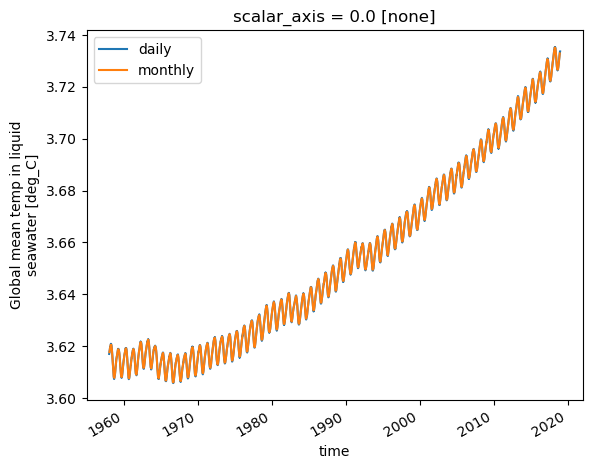

In [16]:
import matplotlib.pyplot as plt

dataset_dict["ocean_scalar_snapshot.1day"]["temp_global_ave"].plot(label="daily")
dataset_dict["ocean_scalar.1mon"]["temp_global_ave"].plot(label="monthly")

_ = plt.legend()

## Another example workflow

Let's compare SST fields from three experiments:

- ACCESS-OM2, `1deg_jra55_iaf_omip2_cycle1`
- ACCESS-ESM1.5, `HI_C_05_r1`
- ACCESS-CM2, `bx944`

First we'll search directly for the experiments by their names and get the intake-esm datastores for those experiments. Here we use the `to_source_dict` method to load the datastores because there is more than one of them.

In [17]:
nri_cat4 = nri_cat.search(
    name=[
        "1deg_jra55_iaf_omip2_cycle1",
        "HI_C_05_r1",
        "bx944"
    ]
)

In [18]:
esm_datastore_dict = nri_cat4.to_source_dict()

esm_datastore_dict

{'HI_C_05_r1': <HI_C_05_r1 catalog with 11 dataset(s) from 7873 asset(s)>,
 '1deg_jra55_iaf_omip2_cycle1': <1deg_jra55_iaf_omip2_cycle1 catalog with 11 dataset(s) from 2013 asset(s)>,
 'bx944': <bx944 catalog with 7 dataset(s) from 12150 asset(s)>}

Now we'll search on monthly SST within each datastore and open each monthly SST dataset as an xarray Dataset (here we use the `to_dask` method instead of `to_dataset_dict` because there is only one dataset remaining in the intake-esm datastore after the search is applied).

In [19]:
# Some useful keyword arguments to make opening with xarray faster
xarray_open_kwargs = dict(
    use_cftime=True,
)
xarray_combine_by_coords_kwargs = dict(
    compat="override",
    data_vars="minimal", 
    coords="minimal",
)
    
dataset_dict = {
    name: datastore.search(
        realm="ocean",
        variable="sst",
        frequency="1mon"
    ).to_dask(
        xarray_open_kwargs=xarray_open_kwargs, 
        xarray_combine_by_coords_kwargs=xarray_combine_by_coords_kwargs
    )
    for name, datastore in esm_datastore_dict.items()
}

Now we can plot our data

In [20]:
def plot_time(dataset_dict, time):
    """ Plot monthly SST at a provided time """
    nrows = len(dataset_dict)
    fig = plt.figure(figsize=(8, nrows*3))
    axs = fig.subplots(nrows,1)
    fig.suptitle(f'Monthly SST, {time}')
    
    for idx, (name, ds) in enumerate(dataset_dict.items()):
        ax = axs[idx]
        if "member" in ds.dims:
            ds = ds.isel(member=0)
        data = ds["sst"].sel(time=time).compute()
        if (data > 273.15).any().item():
            data -= 273.15
        data.plot(ax=ax, cmap="viridis", vmin=-2, vmax=30)
        ax.set_title(name)
        ax.set_xlabel("")
        ax.set_ylabel("")
        
    fig.tight_layout()

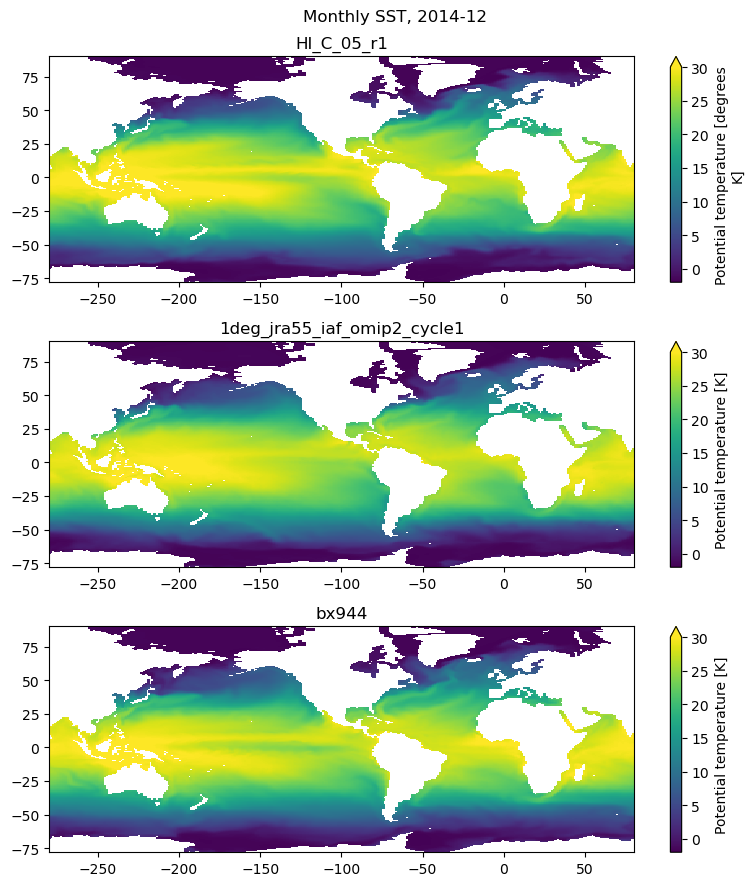

In [21]:
plot_time(dataset_dict, time="2014-12")

Maybe we'd also like to add some CMIP6 data to our plot? That's easy because the NCI CMIP6 intake-esm datastores are already included in the ACCESS-NRI catalog.

In [22]:
cmip6_datastore = nri_cat.search(name="cmip6_fs38").to_source()

In [23]:
ds = cmip6_datastore.search(
    source_id="ACCESS-ESM1-5", 
    table_id="Omon", 
    variable_id="tos", 
    experiment_id="historical", 
    member_id="r1i1p1f1",
    file_type="f"
).to_dask()

dataset_dict["CMIP6 ACCESS-ESM1.5 historical"] = ds.rename({"tos": "sst"})

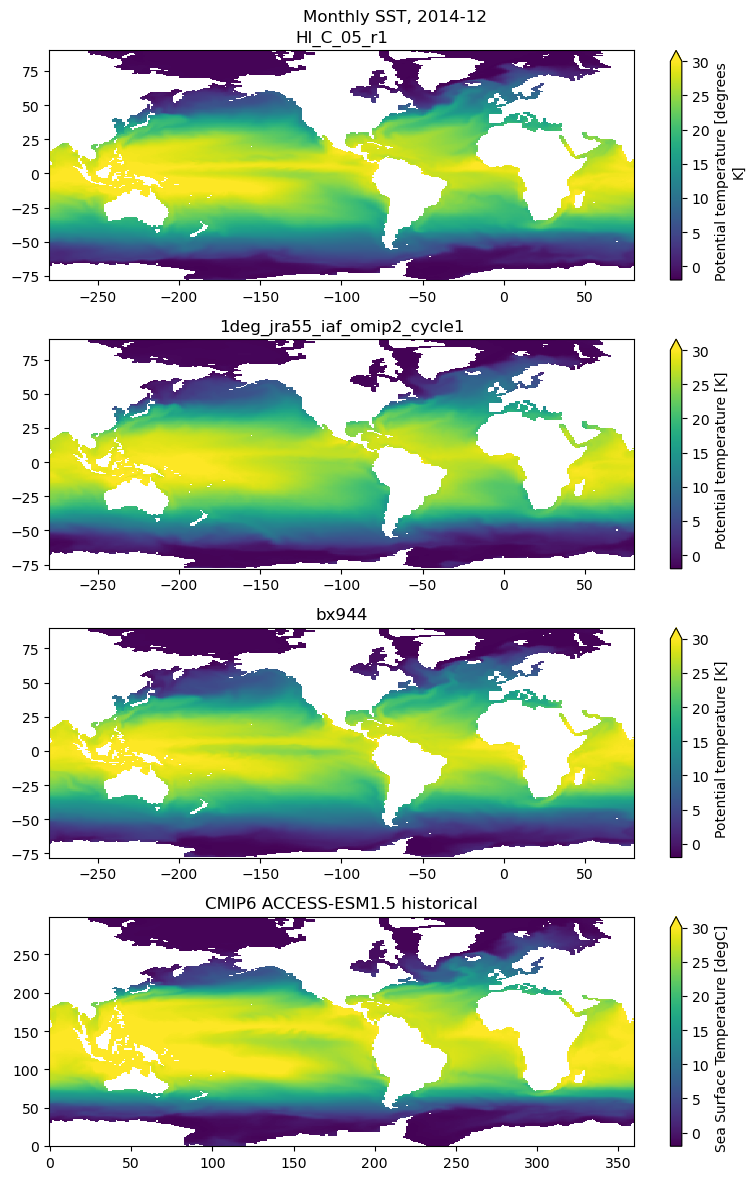

In [24]:
plot_time(dataset_dict, time="2014-12")

In [25]:
client.close()